In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\vatch\AppData\Local\Temp\ipykernel_18188\2359842934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vatch\AppData\Local\Temp\ipykernel_18188\2359842934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [16]:
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X)
print(y)

     Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0         3  22.0      1      0   7.2500      True       False        True
1         1  38.0      1      0  71.2833     False       False       False
2         3  26.0      0      0   7.9250     False       False        True
3         1  35.0      1      0  53.1000     False       False        True
4         3  35.0      0      0   8.0500      True       False        True
..      ...   ...    ...    ...      ...       ...         ...         ...
886       2  27.0      0      0  13.0000      True       False        True
887       1  19.0      0      0  30.0000     False       False        True
888       3  28.0      1      2  23.4500     False       False        True
889       1  26.0      0      0  30.0000      True       False       False
890       3  32.0      0      0   7.7500      True        True       False

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888 

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.82737724 -0.56573646  0.43279337 ...  0.73769513 -0.30756234
   0.61583843]
 [-1.56610693  0.66386103  0.43279337 ... -1.35557354 -0.30756234
  -1.62380254]
 [ 0.82737724 -0.25833709 -0.4745452  ... -1.35557354 -0.30756234
   0.61583843]
 ...
 [ 0.82737724 -0.1046374   0.43279337 ... -1.35557354 -0.30756234
   0.61583843]
 [-1.56610693 -0.25833709 -0.4745452  ...  0.73769513 -0.30756234
  -1.62380254]
 [ 0.82737724  0.20276197 -0.4745452  ...  0.73769513  3.25137334
  -1.62380254]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[-1.56610693  1.24023486 -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]
 [-0.36936484 -0.48888662 -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]
 [ 0.82737724  0.20276197 -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]
 ...
 [ 0.82737724  0.89441056  1.34013193 ...  0.73769513 -0.30756234
   0.61583843]
 [-1.56610693 -1.18053521  0.43279337 ... -1.35557354 -0.30756234
   0.61583843]
 [-1.56610693 -0.6425863  -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]] [[ 0.82737724 -0.1046374   0.43279337 ...  0.73769513 -0.30756234
  -1.62380254]
 [-0.36936484  0.12591213 -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]
 [ 0.82737724 -0.71943615 -0.4745452  ...  0.73769513 -0.30756234
   0.61583843]
 ...
 [ 0.82737724  0.66386103  0.43279337 ... -1.35557354 -0.30756234
   0.61583843]
 [-0.36936484 -0.94998568 -0.4745452  ... -1.35557354 -0.30756234
   0.61583843]
 [ 0.82737724 -1.94903364  0.43279337 ... -1.35557354 -0.30756234
   0.61583843]] 331    0
733    

In [19]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier()


In [20]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('knn', knn_clf)],
    voting='soft'
)

In [21]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [22]:
y_pred = voting_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Ensemble Accuracy: {acc:.4f}")

✅ Ensemble Accuracy: 0.8380


C:\Users\vatch\AppData\Local\Temp\ipykernel_18188\664052601.py:7: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vatch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


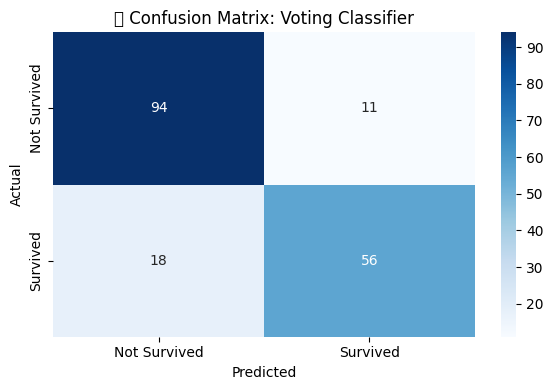

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("🔍 Confusion Matrix: Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()